# Import libraries

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2022-08-21 11:51:09.003590: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Num GPUs Available:  1


2022-08-21 11:51:09.982217: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-21 11:51:09.982745: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-21 11:51:09.996215: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 11:51:09.996388: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:09:00.0 name: NVIDIA GeForce GTX 1660 SUPER computeCapability: 7.5
coreClock: 1.8GHz coreCount: 22 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 312.97GiB/s
2022-08-21 11:51:09.996401: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-08-21 11:51:09.997501: I tensorflow/stream_executor/platfor

In [2]:
print(tf.__version__)

2.4.1


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Prepare Data

In [4]:
# Importing the dataset
dataset = pd.read_csv('Data/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [9]:
# Initialising the ANN
classifier = Sequential()

2022-08-21 11:51:10.782350: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-21 11:51:10.783101: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-21 11:51:10.783275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 11:51:10.783502: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:09:00.0 name: NVIDIA GeForce GTX 1660 SUPER computeCapability: 7.5
coreClock: 1.8GHz coreCount: 22 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 312

In [10]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [11]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=10,activation='relu'))

In [12]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=10,activation='relu'))

In [13]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(1,activation='sigmoid'))

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [15]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

2022-08-21 11:51:11.617653: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-21 11:51:11.617940: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3594980000 Hz


Epoch 1/50
 40/536 [=>............................] - ETA: 0s - loss: 0.7128 - accuracy: 0.3939  

2022-08-21 11:51:11.886278: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


536/536 [==============================] - 2s 2ms/step - loss: 0.5823 - accuracy: 0.6948 - val_loss: 0.4456 - val_accuracy: 0.7989
Epoch 2/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4306 - accuracy: 0.8008 - val_loss: 0.4164 - val_accuracy: 0.8092
Epoch 3/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3887 - accuracy: 0.8322 - val_loss: 0.3958 - val_accuracy: 0.8201
Epoch 4/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3811 - accuracy: 0.8324 - val_loss: 0.3854 - val_accuracy: 0.8304
Epoch 5/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3882 - accuracy: 0.8329 - val_loss: 0.3815 - val_accuracy: 0.8379
Epoch 6/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3415 - accuracy: 0.8533 - val_loss: 0.3753 - val_accuracy: 0.8387
Epoch 7/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8563 - val_loss: 0.3733 - val_accuracy: 0.8463
Epoch 8/50
536/53

In [17]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


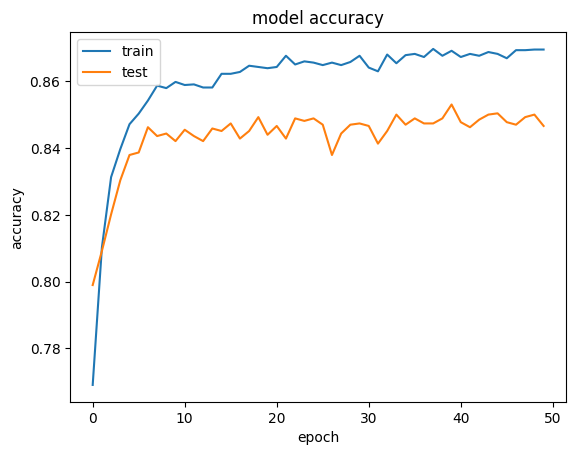

In [18]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

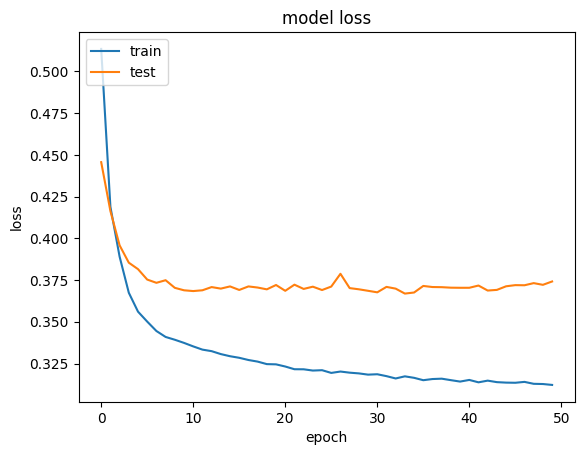

In [19]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1485,  110],
       [ 180,  225]])

In [22]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [23]:
print(f'Model Score is: {score}')

Model Score is: 0.855
